# Click-Through Rate Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d swekerr/click-through-rate-prediction

Dataset URL: https://www.kaggle.com/datasets/swekerr/click-through-rate-prediction
License(s): apache-2.0
100%|█████████████████████████████████████████| 232k/232k [00:00<00:00, 238kB/s]
100%|█████████████████████████████████████████| 232k/232k [00:00<00:00, 238kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Click-Through Rate Prediction/click-through-rate-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Click-Through Rate Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ad_10000records.csv')

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [6]:
df.shape

(10000, 10)

In [7]:
df.size

100000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,10000.0,61.660757,15.704142,32.60,48.8600,59.59,76.58,90.97
Age,10000.0,35.940100,8.572973,19.00,29.0000,35.00,42.00,60.00
Area Income,10000.0,53840.047721,13343.708718,13996.50,44052.3025,56180.93,61840.26,79332.33
Daily Internet Usage,10000.0,177.759831,40.820951,105.22,140.1500,178.92,212.67,269.96
Clicked on Ad,10000.0,0.491700,0.499956,0.00,0.0000,0.00,1.00,1.00


In [10]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(215)

In [13]:
df.nunique()

Daily Time Spent on Site    460
Age                          39
Area Income                 524
Daily Internet Usage        505
Ad Topic Line               559
City                        521
Gender                        2
Country                     207
Timestamp                   567
Clicked on Ad                 2
dtype: int64

In [14]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64

## Data Visualization

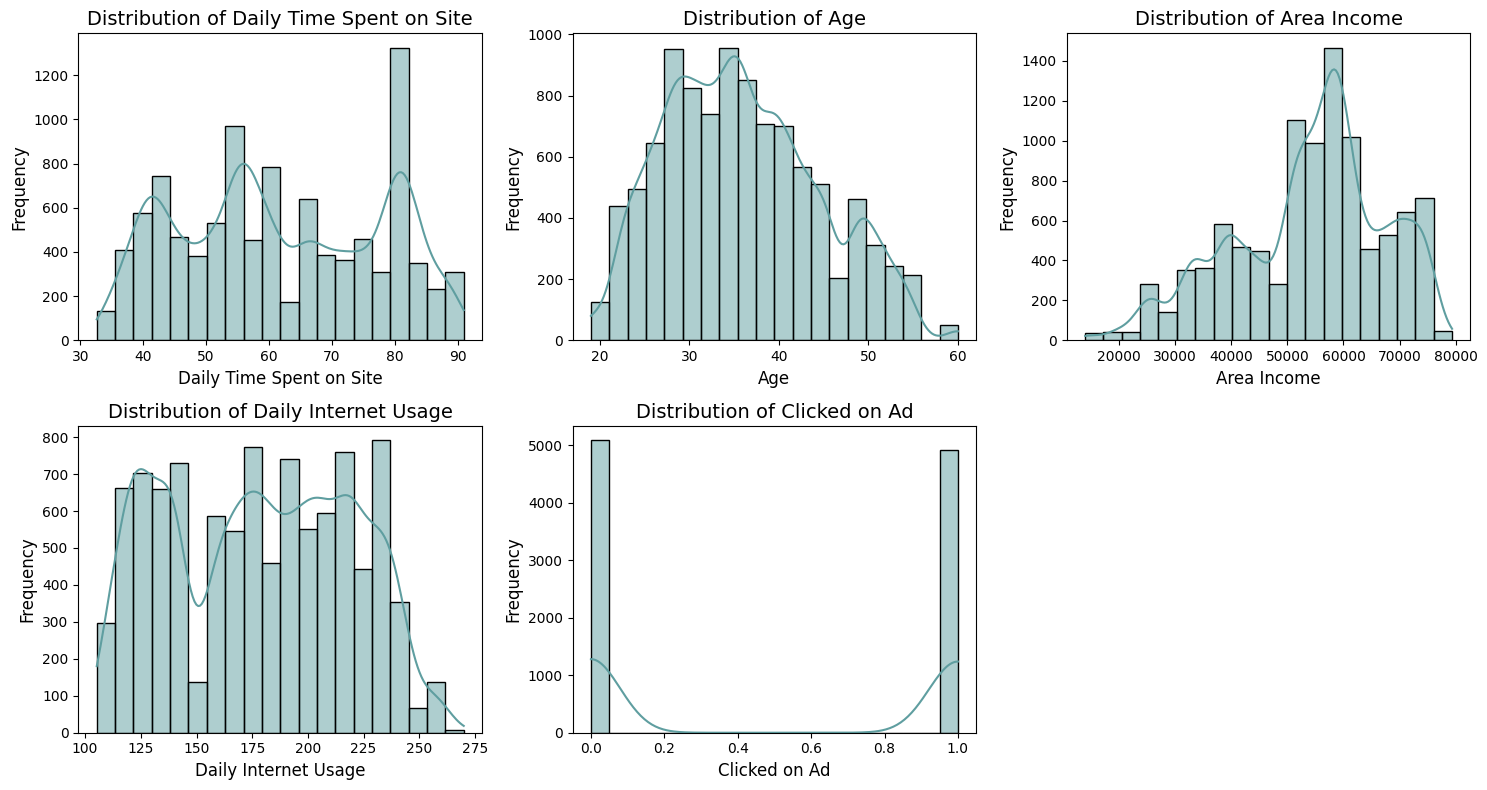

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

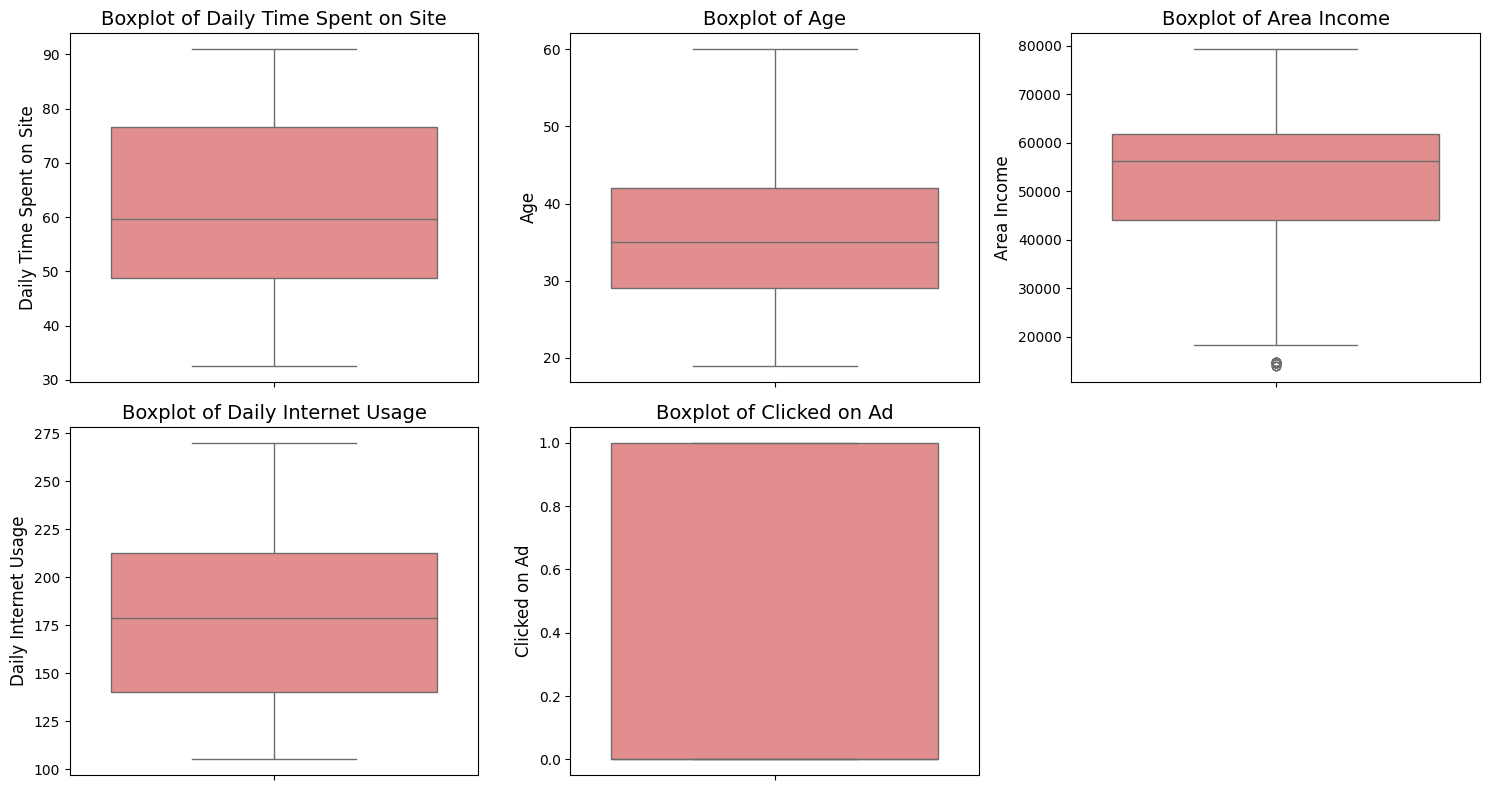

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

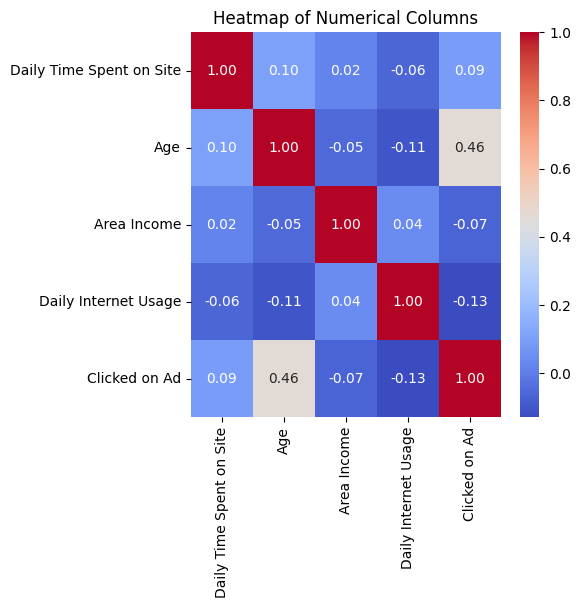

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

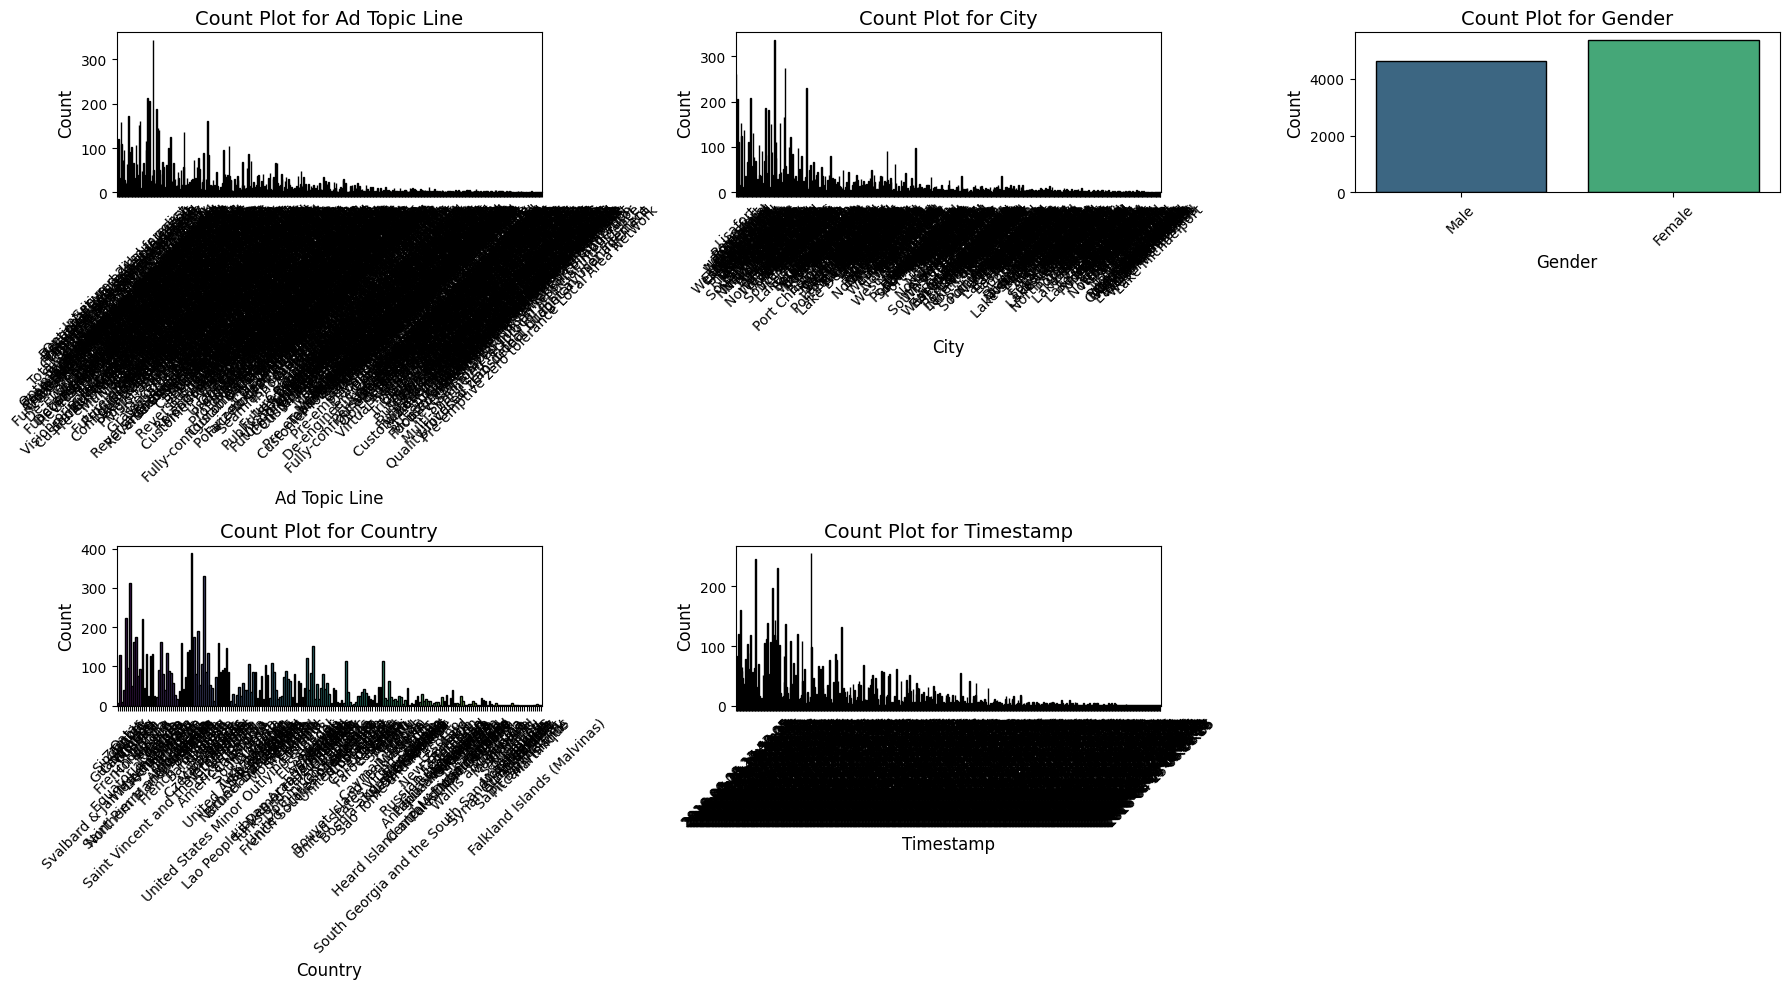

In [19]:
# Plotting each categorical column as a count plot

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [20]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [23]:
# Date time conversion
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

def extract_features(dt):
    return pd.Series({
        'Year': dt.year,
        'Month': dt.month,
        'Day': dt.day,
        'Hour': dt.hour,
        'Day_of_Week': dt.day_name(),
        'Is_Weekend': dt.dayofweek >= 5,
        'Part_of_Day': (
            "Night" if dt.hour < 6 else
            "Morning" if dt.hour < 12 else
            "Afternoon" if dt.hour < 17 else
            "Evening"
        )
    })

features_df = df['Timestamp'].apply(extract_features)
df = pd.concat([df, features_df], axis=1)

In [25]:
df.drop(columns=['Timestamp'], inplace=True)

In [27]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [28]:
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [30]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [32]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7189575881451201, 0.7531936637710782, 0.8676545733265202, 0.8477261113949923, 0.7562595809913132, 0.8226877874297394, 0.8226877874297394, 0.7782319877363311, 0.7036280020439448]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1011
           1       0.71      0.70      0.71       946

    accuracy                           0.72      1957
   macro avg       0.72      0.72      0.72      1957
weighted avg       0.72      0.72      0.72      1957

Confusion Matrix:
 [[748 263]
 [287 659]]


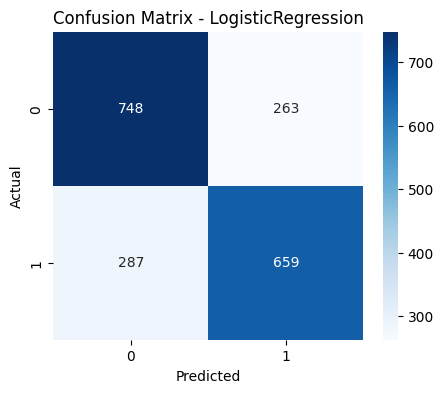

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1011
           1       0.76      0.71      0.74       946

    accuracy                           0.75      1957
   macro avg       0.75      0.75      0.75      1957
weighted avg       0.75      0.75      0.75      1957

Confusion Matrix:
 [[804 207]
 [276 670]]


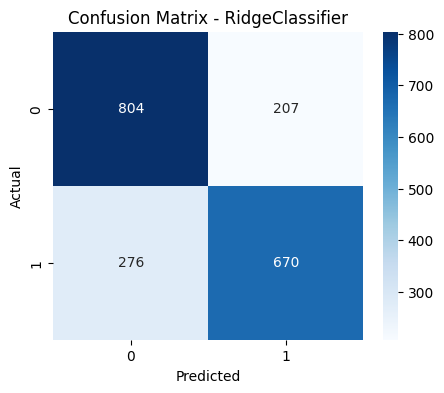

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1011
           1       0.87      0.86      0.86       946

    accuracy                           0.87      1957
   macro avg       0.87      0.87      0.87      1957
weighted avg       0.87      0.87      0.87      1957

Confusion Matrix:
 [[886 125]
 [134 812]]


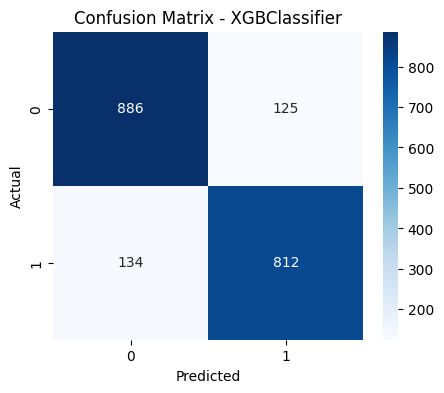

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1011
           1       0.86      0.82      0.84       946

    accuracy                           0.85      1957
   macro avg       0.85      0.85      0.85      1957
weighted avg       0.85      0.85      0.85      1957

Confusion Matrix:
 [[885 126]
 [166 780]]


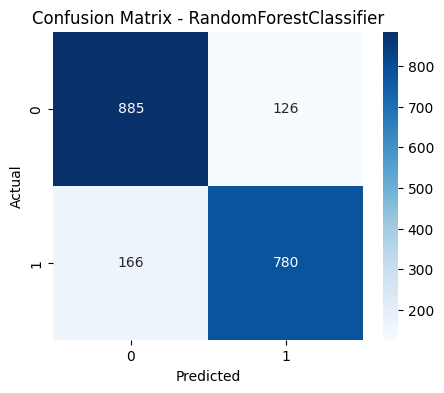

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77      1011
           1       0.77      0.70      0.74       946

    accuracy                           0.76      1957
   macro avg       0.76      0.75      0.75      1957
weighted avg       0.76      0.76      0.76      1957

Confusion Matrix:
 [[814 197]
 [280 666]]


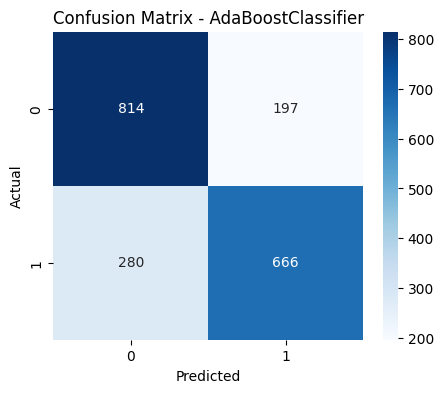

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1011
           1       0.84      0.79      0.81       946

    accuracy                           0.82      1957
   macro avg       0.82      0.82      0.82      1957
weighted avg       0.82      0.82      0.82      1957

Confusion Matrix:
 [[866 145]
 [202 744]]


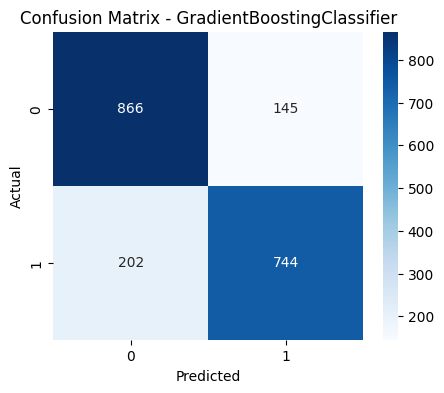

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1011
           1       0.84      0.76      0.80       946

    accuracy                           0.82      1957
   macro avg       0.82      0.81      0.81      1957
weighted avg       0.82      0.82      0.81      1957

Confusion Matrix:
 [[879 132]
 [229 717]]


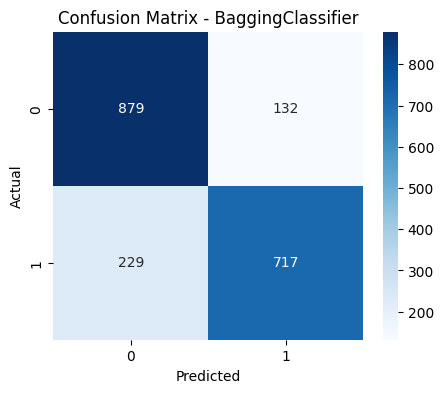

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1011
           1       0.77      0.77      0.77       946

    accuracy                           0.78      1957
   macro avg       0.78      0.78      0.78      1957
weighted avg       0.78      0.78      0.78      1957

Confusion Matrix:
 [[796 215]
 [221 725]]


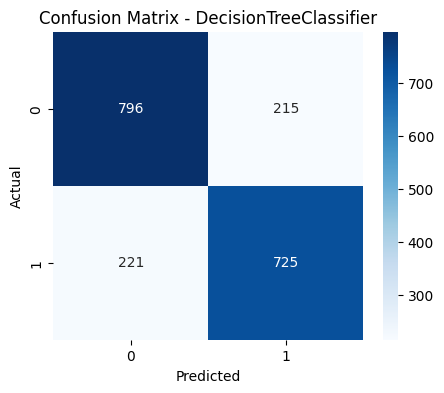

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      1011
           1       0.73      0.61      0.67       946

    accuracy                           0.70      1957
   macro avg       0.71      0.70      0.70      1957
weighted avg       0.71      0.70      0.70      1957

Confusion Matrix:
 [[799 212]
 [368 578]]


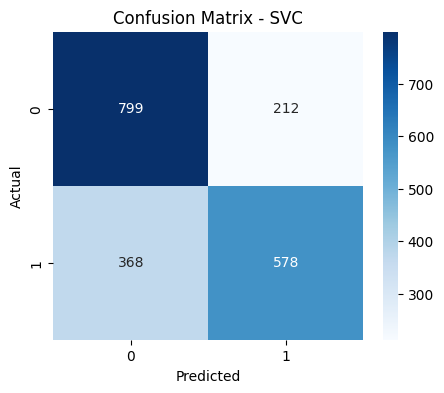

In [33]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()